In [2]:
import rasterio as rio
import rioxarray as rxr
import xarray as xr
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from rasterio.transform import xy
import seaborn as sns
import os

In [9]:
print(os.getcwd())

c:\Users\BIG BOX\Documents\dm__projeeet\S2I-DM\src\eda


In [3]:
def load_monthly_data(folder_path):
    files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')])
    data_arrays = [rxr.open_rasterio(f).squeeze() for f in files]
    combined = xr.concat(data_arrays, dim='month')
    return combined
precip=load_monthly_data("..\..\processed_data\climate_dataset\prec")
tmax=load_monthly_data(r"..\..\processed_data\climate_dataset\tmax")
tmin=load_monthly_data(r"..\..\processed_data\climate_dataset\tmin")

In [15]:
print(precip.coords)
print(precip.shape)
print(precip.attrs)

Coordinates:
  * y            (y) float64 2kB 37.54 37.46 37.38 37.29 ... 19.13 19.04 18.96
  * x            (x) float64 2kB -8.708 -8.625 -8.542 ... 11.79 11.87 11.96
    band         int64 8B 1
    spatial_ref  int64 8B 0
(12, 224, 249)
{'AREA_OR_POINT': 'Area', '_FillValue': np.float32(nan), 'scale_factor': 1.0, 'add_offset': 0.0}


In [4]:
# Flatten values month by month
precip_monthly = [precip.sel(month=i).values.flatten() for i in range(12)]
tmax_monthly = [tmax.sel(month=i).values.flatten() for i in range(12)]
tmin_monthly = [tmin.sel(month=i).values.flatten() for i in range(12)]

### Percipitation

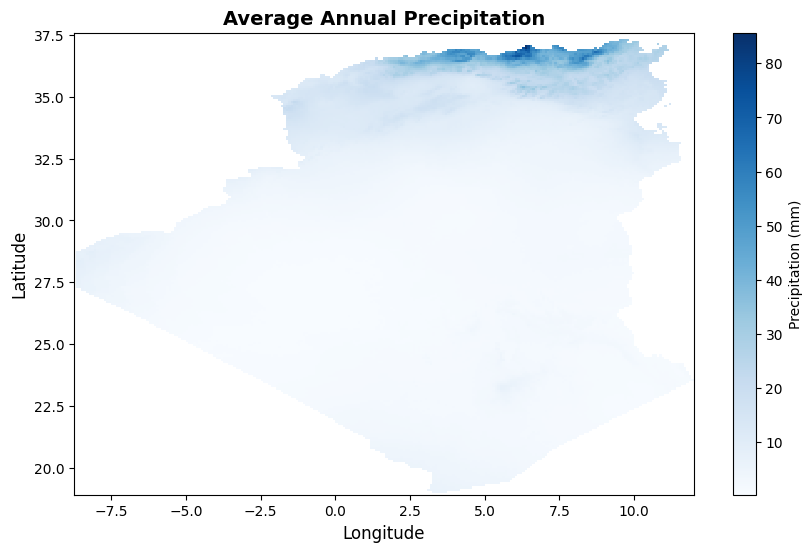

In [12]:
plt.figure(figsize=(10, 6))
avg_precip = precip.mean(dim="month")
avg_precip.plot(
    cmap="Blues",
    cbar_kwargs={"label": "Precipitation (mm)"}
)
plt.title("Average Annual Precipitation", fontsize=14, fontweight="bold")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(False)
plt.show()


In [ ]:
import numpy as np

print("Precipitation stats:")
print("Min:", precip.min().values)
print("Max:", precip.max().values)
print("Mean:", precip.mean().values)
print("Median:", precip.median().values)
values_p=precip.values.flatten()
values_p=values_p[~np.isnan(values_p)]
mode_value_p=stats.mode(values_p, keepdims=True).mode[0]
print("Mode:", mode_value_p)
print("Std:", precip.std().values)
print("Missing values:", np.isnan(precip.values).sum())



Precipitation stats:
Min: 0.0
Max: 266.15
Mean: 5.2938075
Median: 1.7
Mode: 0.0
Std: 11.140009
Missing values: 275820


C:\Users\BIG BOX\AppData\Local\Temp\ipykernel_21064\3147642890.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


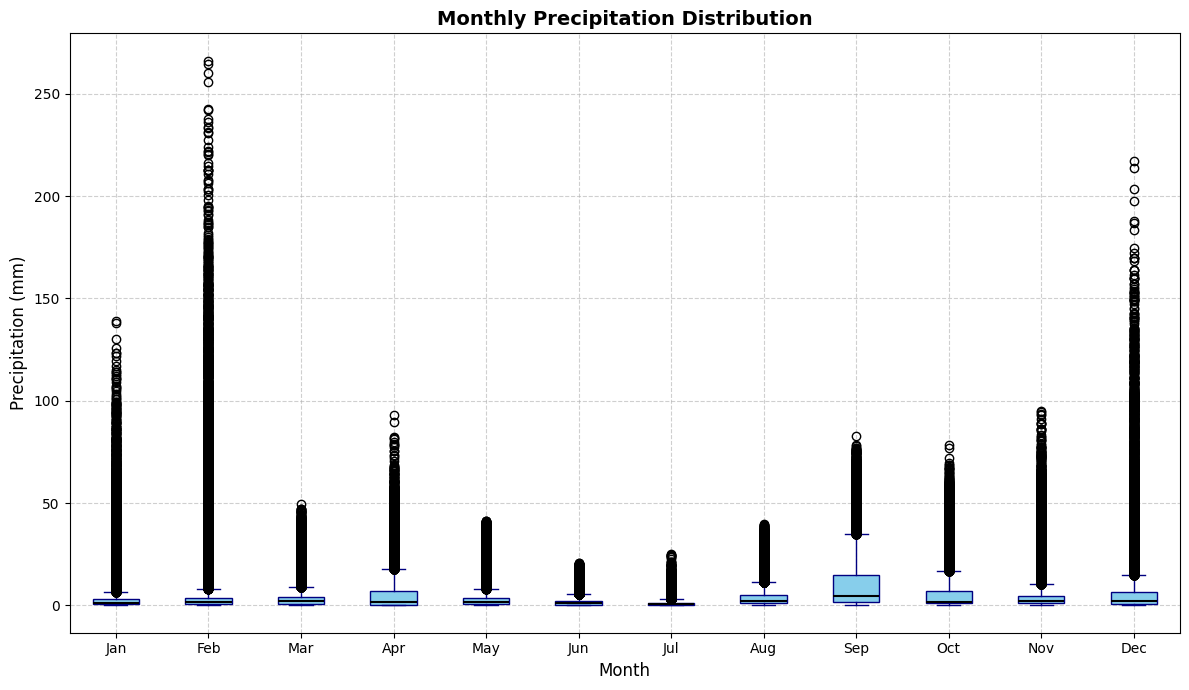

In [10]:
plt.figure(figsize=(12, 7))
box = plt.boxplot(
    [v[~np.isnan(v)] for v in precip_monthly],
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    patch_artist=True,
    medianprops=dict(color="black", linewidth=1.5),
    boxprops=dict(facecolor="skyblue", color="navy"),
    whiskerprops=dict(color="navy"),
    capprops=dict(color="navy")
)

plt.title("Monthly Precipitation Distribution", fontsize=14, fontweight="bold")
plt.ylabel("Precipitation (mm)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


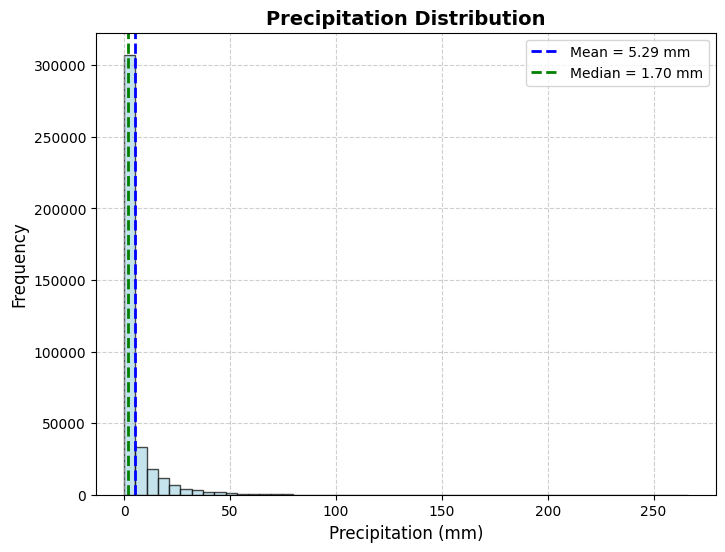

In [9]:
mean_val = precip.mean().values
median_val = precip.median().values

plt.figure(figsize=(8, 6))
precip.plot.hist(bins=50, color="lightblue", edgecolor="black", alpha=0.7)
plt.axvline(mean_val, color="blue", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f} mm")
plt.axvline(median_val, color="green", linestyle="--", linewidth=2, label=f"Median = {median_val:.2f} mm")
plt.title("Precipitation Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Precipitation (mm)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Tmax

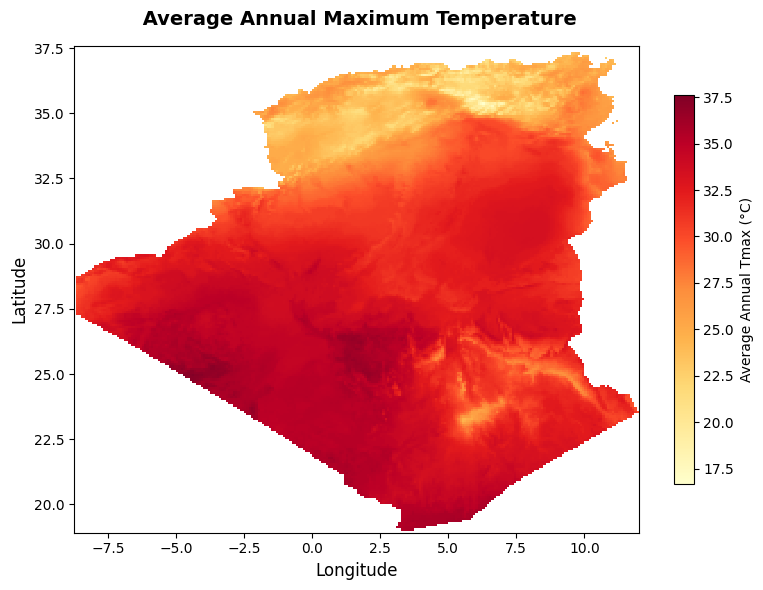

In [26]:
import matplotlib.pyplot as plt

# Compute average Tmax per year
avg_tmax = tmax.mean(dim="month")

# Create figure
plt.figure(figsize=(8, 6))

# Plot with a warm colormap
avg_tmax.plot(
    cmap="YlOrRd",  # warm colormap (yellow-orange-red)
    cbar_kwargs={
        "label": "Average Annual Tmax (°C)", 
        "shrink": 0.8
    }
)

# Add labels and title
plt.title(" Average Annual Maximum Temperature", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)



# Clean layout
plt.tight_layout()
plt.show()


In [24]:
print("\nTmax stats:")
print("Min:", tmax.min().values)
print("Max:", tmax.max().values)
print("Mean:", tmax.mean().values)
print("Median:", tmax.median().values)
values_max=tmax.values.flatten()
values_max=values_max[~np.isnan(values_max)]
mode_value_max=stats.mode(values_max, keepdims=True).mode[0]
print("Mode:", mode_value_max)
print("Std:", tmax.std().values)
print("Missing values:", np.isnan(tmax.values).sum())


Tmax stats:
Min: 5.25
Max: 48.0
Mean: 31.360682
Median: 32.0
Mode: 37.0
Std: 8.545496
Missing values: 275820


C:\Users\BIG BOX\AppData\Local\Temp\ipykernel_21064\2553210429.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


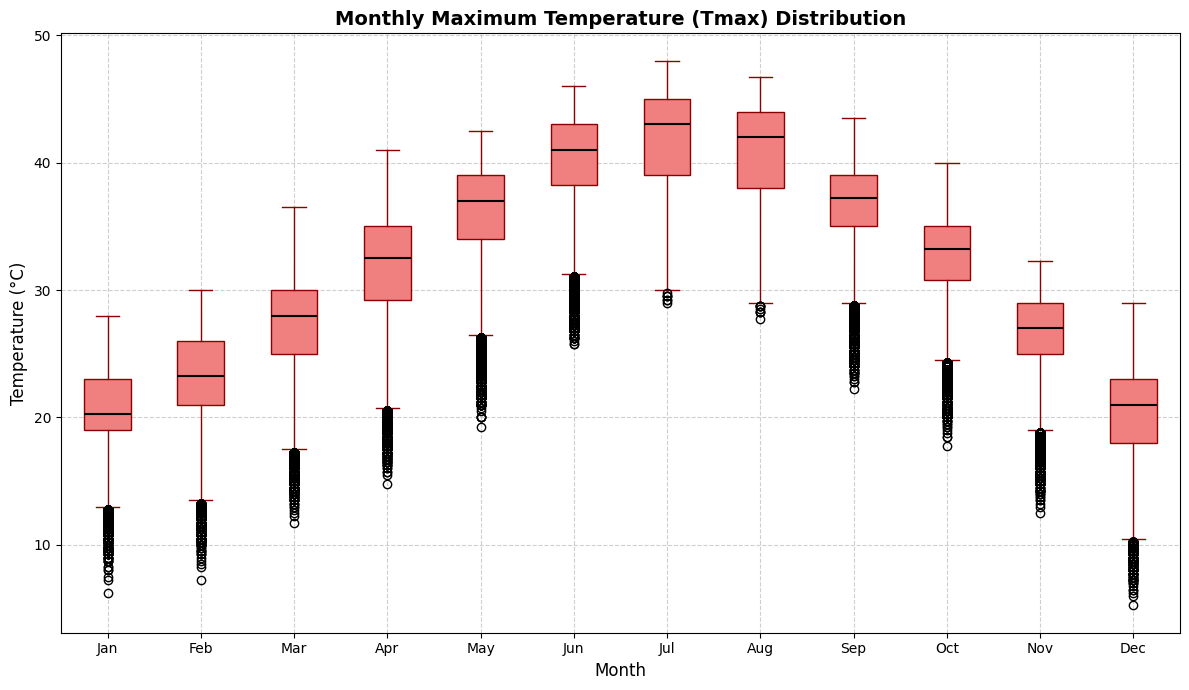

In [8]:
plt.figure(figsize=(12, 7))
box = plt.boxplot(
    [v[~np.isnan(v)] for v in tmax_monthly],
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    patch_artist=True,
    medianprops=dict(color="black", linewidth=1.5),
    boxprops=dict(facecolor="lightcoral", color="darkred"),
    whiskerprops=dict(color="darkred"),
    capprops=dict(color="darkred")
)

plt.title("Monthly Maximum Temperature (Tmax) Distribution", fontsize=14, fontweight="bold")
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


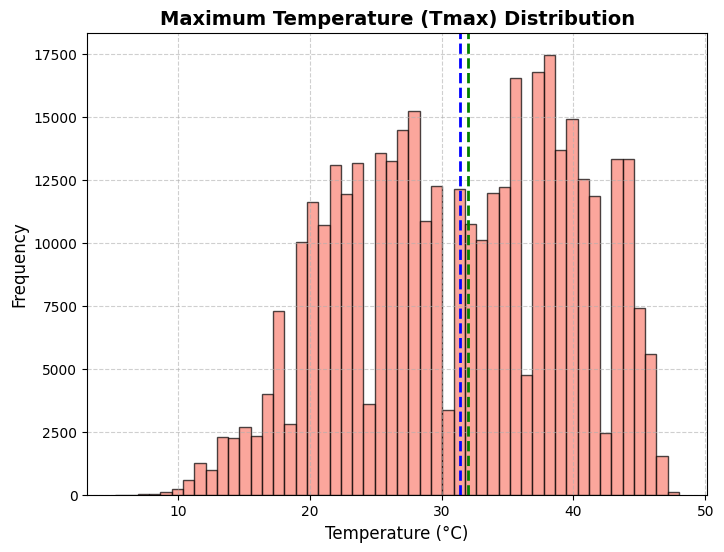

In [27]:
mean_val = tmax.mean().values
median_val = tmax.median().values
plt.figure(figsize=(8, 6))
tmax.plot.hist(
    bins=50,
    color="salmon",         # warm color for Tmax
    edgecolor="black",
    alpha=0.7
)
plt.axvline(mean_val, color="blue", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f} mm")
plt.axvline(median_val, color="green", linestyle="--", linewidth=2, label=f"Median = {median_val:.2f} mm")
plt.title("Maximum Temperature (Tmax) Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Tmin

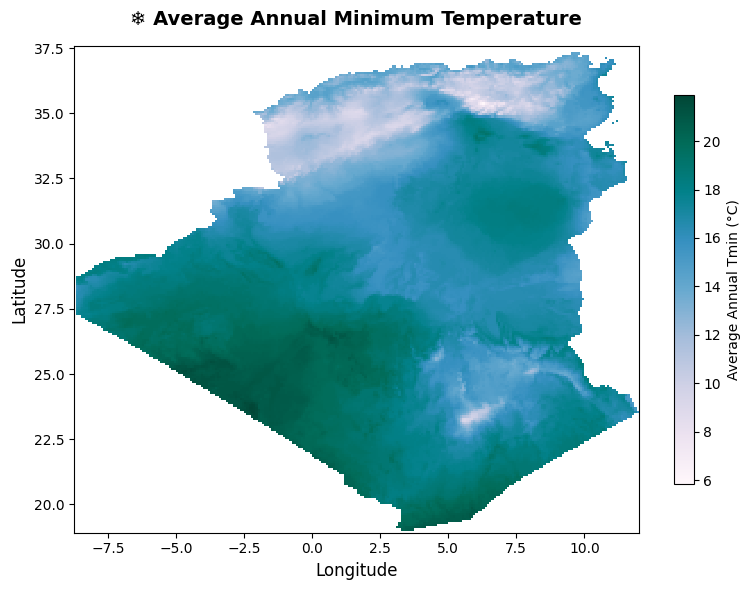

In [25]:
import matplotlib.pyplot as plt

# Compute average Tmin per year
avg_tmin = tmin.mean(dim="month")

# Create figure
plt.figure(figsize=(8, 6))

# Plot with a cool colormap
avg_tmin.plot(
    cmap="PuBuGn",  # cool tones: purple → blue → green
    cbar_kwargs={
        "label": "Average Annual Tmin (°C)",
        "shrink": 0.8
    }
)

# Add labels and title
plt.title("❄️ Average Annual Minimum Temperature", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)



# Adjust layout for beauty
plt.tight_layout()
plt.show()


In [25]:
print("\nTmin stats:")
print("Min:", tmin.min().values)
print("Max:", tmin.max().values)
print("Mean:", tmin.mean().values)
print("Median:", tmin.median().values)
values_min=tmin.values.flatten()
values_min=values_min[~np.isnan(values_min)]
mode_value_min=stats.mode(values_min, keepdims=True).mode[0]
print("Mode:", mode_value_min)
print("Std:", tmin.std().values)
print("Missing values:", np.isnan(tmin.values).sum())


Tmin stats:
Min: -2.25
Max: 32.0
Mean: 16.83729
Median: 17.0
Mode: 25.0
Std: 8.058458
Missing values: 275820


C:\Users\BIG BOX\AppData\Local\Temp\ipykernel_21064\969415717.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


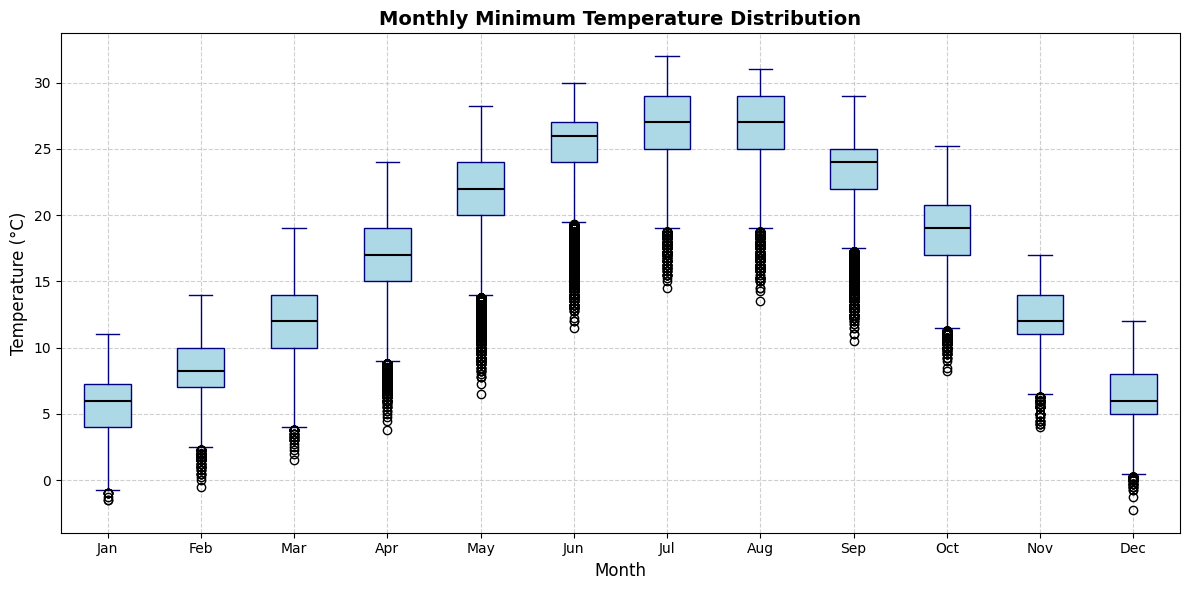

In [6]:
plt.figure(figsize=(12, 6))
box = plt.boxplot(
    [v[~np.isnan(v)] for v in tmin_monthly],
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    patch_artist=True,
    medianprops=dict(color="black", linewidth=1.5),
    boxprops=dict(facecolor="lightblue", color="navy"),
    whiskerprops=dict(color="navy"),
    capprops=dict(color="navy")
)

plt.title("Monthly Minimum Temperature Distribution", fontsize=14, fontweight="bold")
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


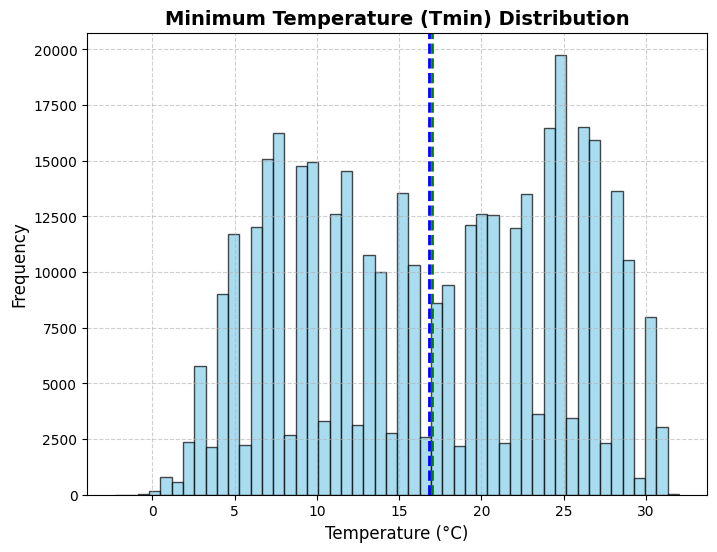

In [28]:

mean_val = tmin.mean().values
median_val = tmin.median().values
plt.figure(figsize=(8, 6))
tmin.plot.hist(
    bins=50, 
    color="skyblue", 
    edgecolor="black", 
    alpha=0.7
)
plt.axvline(mean_val, color="blue", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f} mm")
plt.axvline(median_val, color="green", linestyle="--", linewidth=2, label=f"Median = {median_val:.2f} mm")
plt.title("Minimum Temperature (Tmin) Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Bivariate Analysis

In [29]:
base_dir = r"..\..\processed_data\climate_dataset"
climate_types = ["tmin", "tmax", "prec"]
def raster_to_df(raster_path, variable_name):
    """Convert raster (.tif) to DataFrame with lon, lat, and value columns."""
    with rio.open(raster_path) as src:
        data = src.read(1)
        mask = data != src.nodata
        rows, cols = np.where(mask)
        xs, ys = xy(src.transform, rows, cols)
        df = pd.DataFrame({
            "lon": xs,
            "lat": ys,
            variable_name: data[mask]
        })
    # Extract date from filename (assuming it contains year-month like 2020-01)
    name = os.path.basename(raster_path)
    date_part = name.split("_")[-1].replace(".tif", "")
    df["date"] = date_part
    return df

dfs = []
for ctype in climate_types:
    folder = os.path.join(base_dir, f"{ctype}")
    files = sorted([os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".tif")])
    
    for fpath in files:
        df = raster_to_df(fpath, ctype)
        dfs.append(df)


climate_df = pd.concat(dfs, ignore_index=True)

# Pivot so each variable (tmin, tmax, prec) becomes a column
climate_df = (
    climate_df
    .pivot_table(index=["lon", "lat", "date"], 
                 values=["tmin", "tmax", "prec"], 
                 aggfunc="mean")
    .reset_index()
)

 
climate_df["date"] = pd.to_datetime(climate_df["date"], format="%Y-%m")
climate_df = climate_df[climate_df["date"].dt.year == 2024]

In [30]:
print(climate_df.head())

     lon        lat       date   prec   tmax   tmin
0 -8.625  27.291667 2024-01-01  2.000  22.00   8.00
1 -8.625  27.291667 2024-02-01  0.425  25.00  11.00
2 -8.625  27.291667 2024-03-01  0.500  27.00  13.00
3 -8.625  27.291667 2024-04-01  1.500  32.00  18.00
4 -8.625  27.291667 2024-05-01  0.000  33.25  19.25


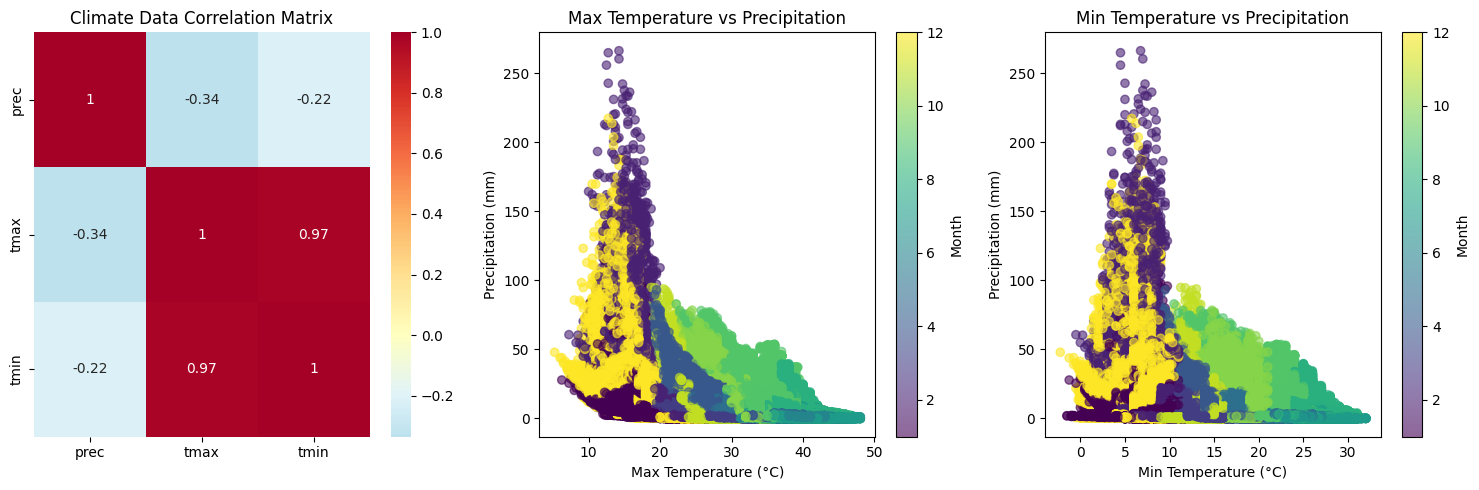

In [44]:
# Create time features
climate_df['month'] = climate_df['date'].dt.month
climate_df['day_of_year'] = climate_df['date'].dt.dayofyear

# Select numeric columns
climate_numeric = climate_df[['prec', 'tmax', 'tmin']]

# Create EDA plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 2.1 Correlation Matrix
corr_matrix = climate_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, ax=axes[0])
axes[0].set_title('Climate Data Correlation Matrix')

# 2.3 Max Temperature vs Precipitation scatter
scatter = axes[1].scatter(climate_df['tmax'], climate_df['prec'], 
                           c=climate_df['month'], cmap='viridis', alpha=0.6)
axes[1].set_xlabel('Max Temperature (°C)')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].set_title('Max Temperature vs Precipitation')
plt.colorbar(scatter, ax=axes[1], label='Month')
# 2.4 Min Temperature vs Precipitation scatter
scatter = axes[2].scatter(climate_df['tmin'], climate_df['prec'], 
                           c=climate_df['month'], cmap='viridis', alpha=0.6)
axes[2].set_xlabel('Min Temperature (°C)')
axes[2].set_ylabel('Precipitation (mm)')
axes[2].set_title('Min Temperature vs Precipitation')
plt.colorbar(scatter, ax=axes[2], label='Month')

plt.tight_layout()
plt.show()
